# <font color="orange"> Segmentation des Clients selon le volume de leurs transactions</font>

La segmentation des clients selon le volume de leurs transactions est une méthode d'analyse qui permet de regrouper les clients d'une entreprise en fonction de la quantité de transactions qu'ils effectuent. Cette segmentation est basée sur le montant total des transactions réalisées par chaque client sur une période donnée. L'objectif principal de cette segmentation est de mieux comprendre le comportement des clients, d'identifier les segments les plus importants et de personnaliser les stratégies marketing et de vente en conséquence.

Avantages de la segmentation des clients selon le volume des transactions:

1. *Identification des clients à forte valeur ajoutée* : En segmentant les clients en fonction du montant de leurs transactions, les entreprises peuvent identifier les clients qui génèrent le plus de revenus. Cela permet de mettre en place des actions spécifiques pour fidéliser ces clients et maximiser leur valeur à long terme.

2. *Personnalisation des offres* : En comprenant les habitudes de consommation des différents segments de clients, les entreprises peuvent personnaliser leurs offres et promotions pour répondre aux besoins spécifiques de chaque segment. Cela permet d'optimiser les campagnes marketing et d'améliorer l'efficacité des efforts de vente.

3. *Prévision des revenus futurs* : En analysant les tendances de dépenses des différents segments de clients, les entreprises peuvent estimer les revenus futurs et anticiper la demande. Cela aide à prendre des décisions éclairées en matière de planification financière, d'approvisionnement et de gestion des stocks.

Types de rapports d'analyste découlant de la segmentation des clients selon le volume des transactions:

1. *Rapport de segmentation des clients* : Ce rapport présente une analyse détaillée des différents segments de clients en fonction de leur volume de transactions. Il fournit des informations sur la répartition des clients dans chaque segment, les caractéristiques communes des clients de chaque segment et les différences significatives entre les segments.

2. *Rapport de valeur client* : Ce rapport met en évidence les clients à forte valeur ajoutée en identifiant les segments qui génèrent le plus de revenus pour l'entreprise. Il fournit des informations sur les profils des clients les plus précieux, leur historique d'achat, leur potentiel de croissance et les stratégies recommandées pour les fidéliser.

3. *Rapport de tendances de dépenses* : Ce rapport analyse les tendances de dépenses des différents segments de clients au fil du temps. Il met en évidence les changements de comportement d'achat, les variations saisonnières, les impacts des promotions ou des événements spéciaux, et fournit des recommandations pour adapter les stratégies marketing en conséquence.

*En résumé, la segmentation des clients selon le volume de leurs transactions offre de nombreux avantages aux entreprises en leur permettant de mieux comprendre leurs clients, de personnaliser leurs offres et de maximiser leur valeur. Les rapports d'analyste découlant de cette segmentation fournissent des informations précieuses pour la prise de décision et l'optimisation des stratégies commerciales.*

## *Let's go* 🫣🫠

## Génération de données de transactions

Dans ce notebook, nous allons générer des données de transactions fictives pour simuler un ensemble de données réel. Cela nous permettra d'utiliser ces données pour effectuer des analyses et des prévisions.

### Importation des bibliothèques
Commençons par importer les bibliothèques nécessaires :

In [86]:
import random
import json
from datetime import datetime, timedelta
from faker import Faker

### Génération de données de transactions
Nous allons maintenant générer les données de transactions :

In [87]:
fake = Faker()

def generate_transaction_data(num_companies, min_transactions, max_transactions):
    companies = []
    transactions = []

    for i in range(num_companies):
        company = {
            "company_id": i + 1,
            "company_name": fake.company()
        }
        companies.append(company)

    transaction_id = 1
    for company in companies:
        num_transactions = random.randint(min_transactions, max_transactions)

        for _ in range(num_transactions):
            transaction = {
                "transaction_id": transaction_id,
                "company_id": company["company_id"],
                "company_name": company["company_name"],
                "transaction_date": generate_random_date(),
                "transaction_time": generate_random_time(),
                "transaction_amount": generate_random_amount(),
                "transaction_details": generate_random_details()
            }

            shuffle_transaction_items(transaction)

            transactions.append(transaction)
            transaction_id += 1

    transactions = introduce_messy_data(transactions)

    random.shuffle(transactions)

    return transactions

def shuffle_transaction_items(transaction):
    items = list(transaction.items())
    random.shuffle(items)
    shuffled_transaction = dict(items)
    transaction.clear()
    transaction.update(shuffled_transaction)

def introduce_messy_data(transactions):
    num_missing_values = random.randint(50, 200)
    for _ in range(num_missing_values):
        transaction = random.choice(transactions)
        field = random.choice(["company_name", "transaction_date", "transaction_time", "transaction_amount"])
        transaction[field] = None

    num_inconsistent_names = random.randint(20, 50)
    for _ in range(num_inconsistent_names):
        transaction = random.choice(transactions)
        transaction["company_name"] = fake.random_element()

    num_inconsistent_dates = random.randint(20, 50)
    for _ in range(num_inconsistent_dates):
        transaction = random.choice(transactions)
        transaction["transaction_date"] = generate_random_date()

    num_incorrect_amounts = random.randint(20, 50)
    for _ in range(num_incorrect_amounts):
        transaction = random.choice(transactions)
        transaction["transaction_amount"] = round(random.uniform(100000, 1000000), 2)

    return transactions

def generate_random_date():
    start_date = datetime(2022, 1, 1)
    end_date = datetime(2022, 12, 31)
    random_date = start_date + timedelta(days=random.randint(0, (end_date - start_date).days))
    return random_date.strftime("%Y-%m-%d")

def generate_random_time():
    random_time = datetime.strptime(f"{random.randint(0, 23):02d}:{random.randint(0, 59):02d}", "%H:%M")
    return random_time.strftime("%H:%M")

def generate_random_amount():
    return round(random.uniform(10, 10000), 2)

def generate_random_details():
    return fake.text(max_nb_chars=50)

num_companies = random.randint(50, 200)
min_transactions = 20
max_transactions = 30

transactions = generate_transaction_data(num_companies, min_transactions, max_transactions)

with open("../Data/transaction_data.json", "w") as file:
    json.dump(transactions, file, indent=4)

print("Les données de transactions ont été générées et enregistrées dans le dossier Data.")

Les données de transactions ont été générées et enregistrées dans le dossier Data.


Ce code utilise la bibliothèque Faker pour générer des données de transaction fictives. Il crée des transactions pour un nombre aléatoire d'entreprises avec un nombre aléatoire de transactions par entreprise. Les données sont ensuite mélangées et des incohérences sont introduites pour simuler des données réelles.

Les données de transaction générées sont enregistrées au format JSON dans le fichier "Data/transaction_data.json".

N'hésitez pas à modifier les paramètres de génération des données (num_companies, min_transactions, max_transactions) selon vos besoins.

Assurez-vous de créer un dossier "Data" dans le répertoire courant pour enregistrer les données générées.

Voici une explication du rôle de chaque fonction dans le code fourni :

1. *generate_transaction_data(num_companies, min_transactions, max_transactions)* : Cette fonction génère les données de transaction pour un nombre spécifié d'entreprises avec un nombre aléatoire de transactions par entreprise. Elle renvoie une liste de transactions.

2. *shuffle_transaction_items(transaction)*: Cette fonction mélange aléatoirement les éléments d'une transaction. Elle est utilisée pour introduire un désordre dans les données en modifiant l'ordre des champs d'une transaction.

3. *introduce_messy_data(transactions)*: Cette fonction introduit des incohérences dans les données en modifiant certains champs aléatoirement. Par exemple, elle peut remplacer le nom de l'entreprise par un autre nom aléatoire, ou modifier la date de transaction pour la rendre incohérente.

4. *generate_random_date()*: Cette fonction génère une date aléatoire dans une plage spécifiée. Elle est utilisée pour attribuer des dates aléatoires aux transactions.

5. *generate_random_time()*: Cette fonction génère une heure aléatoire. Elle est utilisée pour attribuer des heures aléatoires aux transactions.

6. *generate_random_amount()*: Cette fonction génère un montant aléatoire pour une transaction. Elle est utilisée pour attribuer des montants aléatoires aux transactions.

7. *generate_random_details()*: Cette fonction génère des détails aléatoires pour une transaction. Elle est utilisée pour attribuer des détails aléatoires aux transactions.

La fonction principale du code est generate_transaction_data, qui orchestre la génération de données de transactions en utilisant les autres fonctions auxiliaires.

Voici un exemple d'échantillon de données :

### EXEMPLE DE DONNÉES

In [ ]:
# DATA SAMPLE
[
    {
        "company_name": "Jimenez, Matthews and Osborne",
        "transaction_amount": 8183.22,
        "transaction_date": "2022-07-07",
        "transaction_id": 796,
        "transaction_time": "18:01",
        "transaction_details": "Loss huge evening politics painting reality.",
        "company_id": 32
    },
    {
        "transaction_time": "19:01",
        "transaction_id": 1515,
        "transaction_date": "2022-01-03",
        "transaction_amount": 2148.32,
        "company_name": "King Ltd",
        "transaction_details": "Three recently concern minute doctor set list.",
        "company_id": 62
    },
    {
        "transaction_time": "00:14",
        "transaction_id": 1435,
        "transaction_amount": 9366.72,
        "transaction_details": "Character language others although recent last.",
        "company_name": "Miller Group",
        "company_id": 58,
        "transaction_date": "2022-07-12"
    },
    {
        "company_name": "Lopez Ltd",
        "transaction_id": 2260,
        "company_id": 91,
        "transaction_date": "2022-11-30",
        "transaction_amount": 3085.58,
        "transaction_details": "Position Mr wall science series.",
        "transaction_time": "20:17"
    },
]

Cet exemple montre un échantillon de données de transactions. Chaque élément de la liste représente une transaction avec les informations suivantes :

* *company_name* : Le nom de l'entreprise associée à la transaction.

* *transaction_amount* : Le montant de la transaction.

* *transaction_date* : La date de la transaction au format "AAAA-MM-JJ".

* *transaction_id* : L'identifiant unique de la transaction.

* *transaction_time* : L'heure de la transaction au format "HH:MM".

* *transaction_details* : Les détails de la transaction.

* *company_id* : L'identifiant unique de l'entreprise associée à la transaction.

*Chaque transaction dans cet exemple est générée de manière aléatoire et comprend des valeurs fictives pour illustrer la structure des données.*

N'hésitez pas à modifier ou à utiliser cet exemple pour vous aider à comprendre la structure de vos propres données de transactions.

`NB : Il y a plus de 3500 transactions enregister dans le fichier .json`

## Chargement des données de transactions depuis un fichier JSON

Dans cette étape, nous chargeons les données de transactions à partir d'un fichier JSON. Nous utilisons la fonction `open` pour ouvrir le fichier JSON et `json.load` pour charger les données dans une variable appelée `data`.

In [4]:
import json

with open('../Data/transaction_data.json') as f:
    data = json.load(f)

## Transformation des données en DataFrame
Nous transformons ensuite les données JSON en un DataFrame tabulaire en utilisant la fonction `pd.json_normalize`. Cela nous permet de convertir les données JSON en colonnes et lignes structurées.

In [5]:
import pandas as pd

df = pd.json_normalize(data)

## Exportation des données vers un fichier CSV
Nous exportons le DataFrame vers un fichier CSV à l'aide de la méthode `to_csv`. Cela nous permet de sauvegarder les données structurées dans un format facilement accessible.

In [6]:
df.to_csv('data.csv', index=False)

## Lecture des données depuis le fichier CSV
Nous lisons ensuite les données depuis le fichier CSV que nous venons de créer en utilisant la fonction `pd.read_csv`. Les données sont chargées dans un nouveau DataFrame appelé `df`.

In [7]:
df = pd.read_csv('data.csv')

# Nettoyage des données
Nous effectuons plusieurs étapes de nettoyage des données pour assurer leur qualité et leur cohérence.

### Suppression des valeurs manquantes
Nous supprimons les lignes contenant des valeurs manquantes (NaN) dans le DataFrame à l'aide de la méthode `dropna`. Cela nous permet de supprimer les enregistrements incomplets ou incorrects.

In [8]:
df.dropna(inplace=True)

### Réorganisation des colonnes
Nous réorganisons les colonnes du DataFrame dans un nouvel ordre spécifié à l'aide de la méthode `reindex`. Cela nous permet de réorganiser les colonnes selon nos besoins.

In [9]:
df = df.reindex(columns=['company_id', 'company_name', 'transaction_id', 'transaction_time', 'transaction_date', 'transaction_amount', 'transaction_details'])

### Affichage des données
Enfin, nous affichons le DataFrame final pour visualiser les données nettoyées et structurées.


In [11]:
print(df.to_string())

Ici j'explique étape par étape le processus de nettoyage des données, en commençant par le chargement des données depuis un fichier JSON, en les transformant en un DataFrame, en les exportant vers un fichier CSV, en effectuant des opérations de nettoyage (suppression des valeurs manquantes, réorganisation des colonnes) et enfin en affichant les données finales.

N'hésitez pas à personnaliser le notebook en ajoutant des explications supplémentaires, des visualisations ou des analyses spécifiques à vos données !

## Calcul des dépenses totales d'une entreprise spécifique

Dans cette partie, nous calculons les dépenses totales d'une entreprise spécifique. Voici comment nous procédons :

In [ ]:
company_name = 'Mcbride and Sons'
company_spending = df[df['company_name'] == company_name]['transaction_amount'].sum()
print(f"{company_name} spends ${company_spending} in total.")

1. Nous définissons le nom de l'entreprise que nous souhaitons analyser, par exemple 'Mcbride and Sons'.

2. En utilisant le DataFrame `df`, nous filtrons les lignes correspondant à l'entreprise spécifiée et sélectionnons la colonne 'transaction_amount'. Nous utilisons la méthode `sum()` pour calculer la somme totale des montants des transactions.

3. Enfin, nous affichons le résultat avec un message indiquant le nom de l'entreprise et le montant total des dépenses.

Cela nous permet de connaître le montant total des dépenses de l'entreprise spécifiée.

N'hésitez pas à personnaliser le nom de l'entreprise ou à ajouter d'autres opérations d'analyse en fonction de vos besoins !

## Calcul des 50 premières entreprises avec les dépenses les plus élevées

Dans cette étape, nous effectuons une analyse pour déterminer les 50 entreprises avec les dépenses totales les plus élevées. Pour cela, nous regroupons les données par nom de l'entreprise, puis nous calculons la somme des montants de transaction pour chaque entreprise en utilisant la méthode `groupby` et `sum`. Ensuite, nous sélectionnons les 50 entreprises avec les dépenses les plus élevées en utilisant la méthode `nlargest`.


In [ ]:
top_50_companies = df.groupby('company_name')['transaction_amount'].sum().nlargest(50)
top_50_companies

## Création du graphique des 50 premières entreprises par montant de transaction

Dans cette étape, vous utilisez la bibliothèque matplotlib.pyplot pour créer un graphique à barres qui affiche les 50 premières entreprises en termes de montant de transaction. Voici ce que chaque ligne de code fait :


In [ ]:
import matplotlib.pyplot as plt

Cette ligne importe la bibliothèque `matplotlib.pyplot` qui sera utilisée pour créer le graphique.

In [ ]:
plt.figure(figsize=(12, 6))

Cette ligne crée une nouvelle figure avec une taille de 12 pouces de largeur et 6 pouces de hauteur. La figure servira de conteneur pour le graphique à barres.

In [ ]:
plt.bar(top_50_companies.index, top_50_companies.values)

Cette ligne trace le graphique à barres en utilisant la méthode `bar`. `top_50_companies.index` est utilisé comme les valeurs de l'axe des x, représentant les noms des 50 premières entreprises. `top_50_companies.values` est utilisé comme les valeurs de l'axe des y, représentant les montants de transaction correspondants.

In [ ]:
plt.xticks(rotation=90)

Cette ligne fait pivoter les étiquettes de l'axe des x de 90 degrés pour éviter les chevauchements et améliorer la lisibilité.

In [ ]:
plt.xlabel('Company Name')
plt.ylabel('Transaction Amount')

Ces lignes définissent les étiquettes des axes x et y pour indiquer ce qu'ils représentent.

In [ ]:
plt.title('Top 50 Companies by Transaction Amount')

Cette ligne définit le titre du graphique.

In [ ]:
plt.tight_layout()

Cette ligne ajuste automatiquement les marges du graphique pour éviter que les éléments se chevauchent.

In [ ]:
plt.show()

Cette ligne affiche le graphique à l'écran.

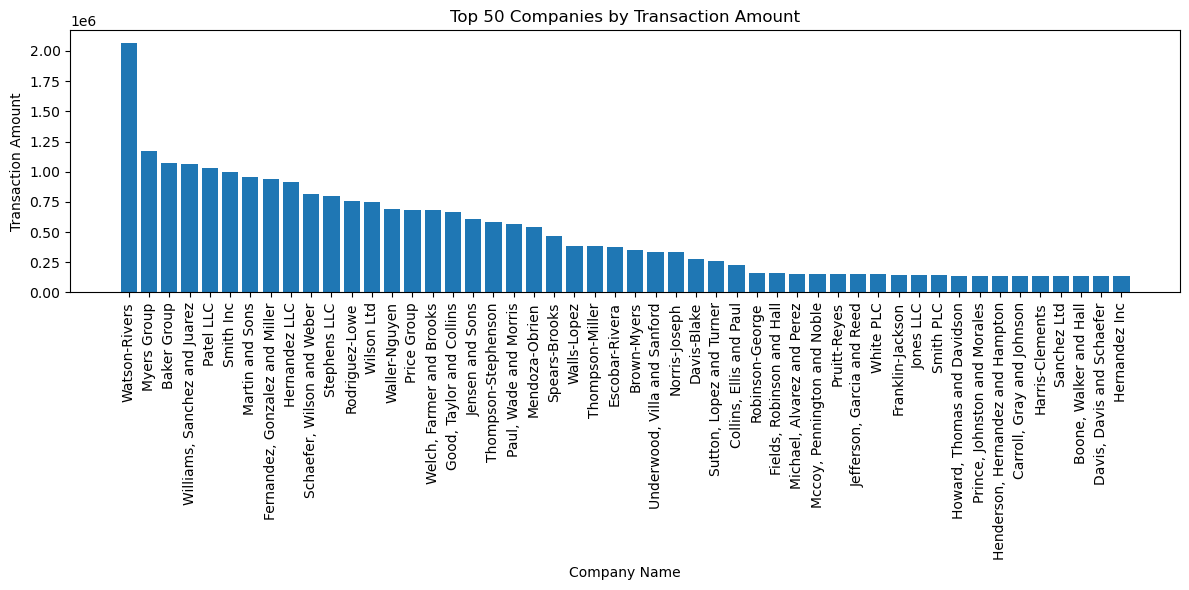

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(top_50_companies.index, top_50_companies.values)

plt.xticks(rotation=90)

plt.xlabel('Company Name')
plt.ylabel('Transaction Amount')

plt.title('Top 50 Companies by Transaction Amount')

plt.tight_layout()

plt.show()



*Ce code génère donc un graphique à barres qui montre les 50 premières entreprises classées par montant de transaction. Chaque barre représente une entreprise et sa hauteur correspond au montant de la transaction.*

N'hésitez pas à personnaliser le graphique en ajoutant des légendes, des couleurs ou d'autres fonctionnalités spécifiques à vos besoins.

## Création du graphique linéaire des montants de transaction des 50 premières entreprises

Dans cette étape, vous utilisez la bibliothèque matplotlib.pyplot pour créer un graphique linéaire qui affiche les montants de transaction des 50 premières entreprises. Voici ce que chaque ligne de code fait :

In [ ]:
df_top_50 = top_50_companies.reset_index()

Cette ligne crée un nouveau DataFrame `df_top_50` à partir du `top_50_companies` en réinitialisant l'index et en ajoutant une nouvelle colonne 'company_name' pour les noms des entreprises.

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

Cette ligne crée une nouvelle figure et un axe pour le graphique linéaire. La figure a une taille de 12 pouces de largeur et 8 pouces de hauteur.

In [ ]:
ax.plot(df_top_50['company_name'], df_top_50['transaction_amount'], marker='o', linestyle='-')

Cette ligne trace le graphique linéaire en utilisant la méthode plot de l'axe (`ax`). `df_top_50['company_name']` est utilisé comme les valeurs de l'axe des x, représentant les noms des entreprises. `df_top_50['transaction_amount']` est utilisé comme les valeurs de l'axe des y, représentant les montants de transaction correspondants. Le paramètre `marker='o'` définit des cercles comme marqueurs pour chaque point de données, et `linestyle='-'` définit une ligne solide pour relier les points.

In [ ]:
ax.set_xlabel('Company Name')
ax.set_ylabel('Transaction Amount')

Ces lignes définissent les étiquettes des axes x et y pour indiquer ce qu'ils représentent.

In [ ]:
ax.set_title('Top 50 Companies by Transaction Amount')

Cette ligne définit le titre du graphique.

In [ ]:
ax.tick_params(axis='x', rotation=90)

Cette ligne ajuste les paramètres des marqueurs sur l'axe des x pour éviter les chevauchements des étiquettes en les faisant pivoter de 90 degrés.

In [ ]:
plt.show()

Cette ligne affiche le graphique linéaire à l'écran.

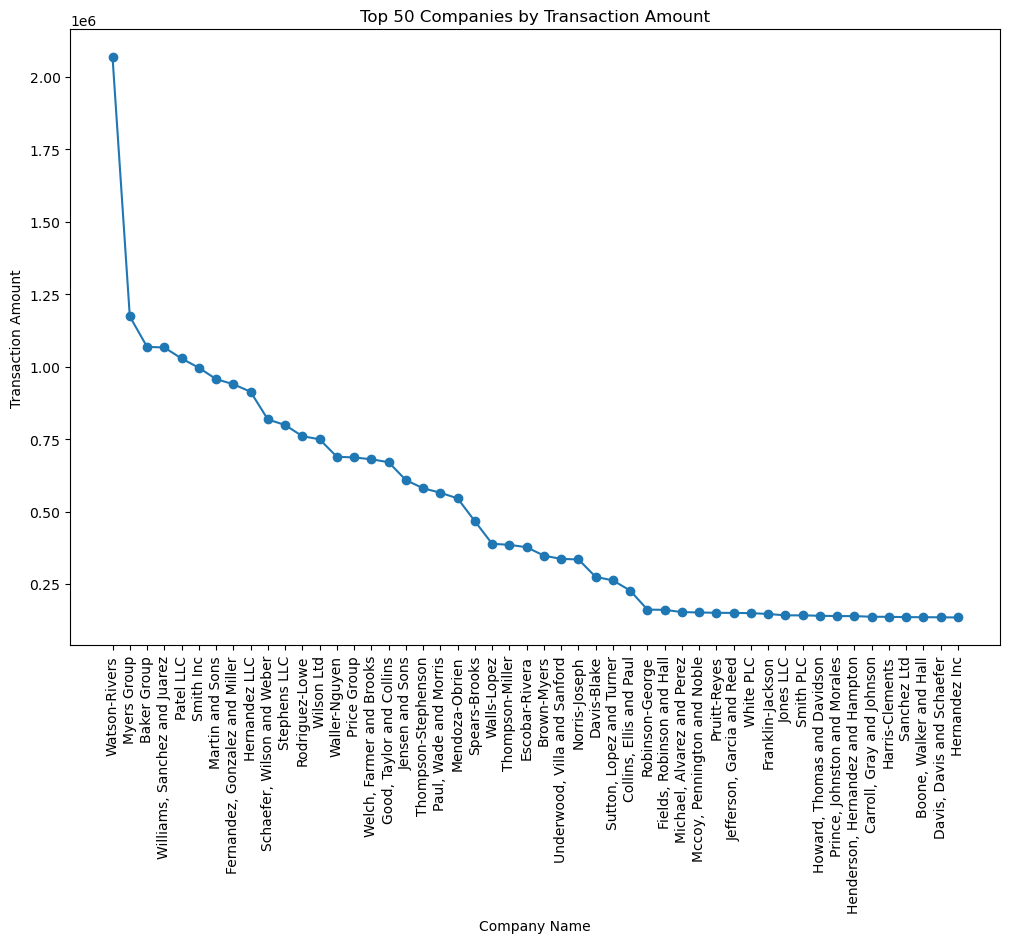

In [81]:
df_top_50 = top_50_companies.reset_index()

fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(df_top_50['company_name'], df_top_50['transaction_amount'], marker='o', linestyle='-')
ax.set_xlabel('Company Name')

ax.set_ylabel('Transaction Amount')
ax.set_title('Top 50 Companies by Transaction Amount')
ax.tick_params(axis='x', rotation=90)
plt.show()


*Ce code génère donc un graphique linéaire qui montre les montants de transaction des 50 premières entreprises. Chaque point représente une entreprise et sa position sur l'axe des x correspond au nom de l'entreprise, tandis que sa position sur l'axe des y correspond au montant de la transaction.*

N'hésitez pas à personnaliser le graphique en ajoutant des légendes, des couleurs ou d'autres fonctionnalités spécifiques à vos besoins.

```python
top_10_companies = df.groupby('company_name')['transaction_amount'].sum().nlargest(10)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(top_10_companies.index, top_10_companies.values)
plt.xticks(rotation=90)
plt.xlabel('Company Name')
plt.ylabel('Transaction Amount')
plt.title('Top 10 Companies by Transaction Amount')

plt.tight_layout()

plt.show()


*Ce code calcule les montants de transaction totaux pour chaque entreprise, puis sélectionne les 10 entreprises ayant les montants les plus élevés. Ensuite, il crée un graphique à barres qui affiche les montants de transaction des 10 premières entreprises. Les noms des entreprises sont affichés sur l'axe des x et les montants de transaction sont affichés sur l'axe des y. Le graphique est ensuite affiché à l'écran. En résumé, ce code permet de visualiser les 10 premières entreprises avec les montants de transaction les plus élevés à l'aide d'un graphique à barres.*

## Segmentation et classification des transactions des entreprises

Dans cette étape, vous effectuez une segmentation et une classification des transactions des entreprises en fonction de leurs montants. Voici ce que chaque ligne de code fait :

In [72]:
df_top_50 = top_50_companies.reset_index()

Cette ligne crée un nouveau DataFrame `df_top_50` à partir du `top_50_companies` en réinitialisant l'index et en ajoutant une nouvelle colonne 'company_name' pour les noms des entreprises.


In [73]:
group_1 = df_top_50[df_top_50['transaction_amount'] <= 1000000]
group_2 = df_top_50[(df_top_50['transaction_amount'] > 1000000) & (df_top_50['transaction_amount'] < 2000000)]
group_3 = df_top_50[df_top_50['transaction_amount'] >= 2000000]

Ces lignes créent trois groupes de données en fonction des montants de transaction. `group_1` contient les entreprises dont les montants de transaction sont inférieurs ou égaux à 1 million, `group_2` contient les entreprises dont les montants de transaction sont compris entre 1 million et 2 millions, et `group_3` contient les entreprises dont les montants de transaction sont supérieurs ou égaux à 2 millions.

In [82]:
fig, ax = plt.subplots(figsize=(12, 8))

Cette ligne crée une nouvelle figure et un axe pour le graphique. La figure a une taille de 12 pouces de largeur et 8 pouces de hauteur.

In [75]:
ax.plot(group_1['company_name'], group_1['transaction_amount'], marker='o', linestyle='-', label='0-1 million')
ax.plot(group_2['company_name'], group_2['transaction_amount'], marker='o', linestyle='-', label='1-2 million')
ax.plot(group_3['company_name'], group_3['transaction_amount'], marker='o', linestyle='-', label='2 million and above')

Ces lignes tracent les graphiques en utilisant la méthode `plot` de l'axe (`ax`). Chaque groupe est représenté par une ligne avec des marqueurs. Les noms des entreprises sont utilisés comme les valeurs de l'axe des x, et les montants de transaction sont utilisés comme les valeurs de l'axe des y. Chaque groupe a un libellé correspondant à la plage de montants.

In [76]:
ax.set_xlabel('Company Name')
ax.set_ylabel('Transaction Amount')

Text(4.444444444444452, 0.5, 'Transaction Amount')

Ces lignes définissent les étiquettes des axes x et y pour indiquer ce qu'ils représentent.

In [77]:
ax.set_title('Companies Segmented by Transaction Amount')

Text(0.5, 1.0, 'Companies Segmented by Transaction Amount')

Cette ligne définit le titre du graphique.

In [78]:
ax.tick_params(axis='x', rotation=90)
ax.legend()

Ces lignes ajustent les paramètres des marqueurs sur l'axe des x pour éviter les chevauchements des étiquettes en les faisant pivoter de 90 degrés, et ajoutent une légende pour identifier les différentes plages de montants.

In [79]:
plt.show()

Cette ligne affiche le graphique à l'écran.

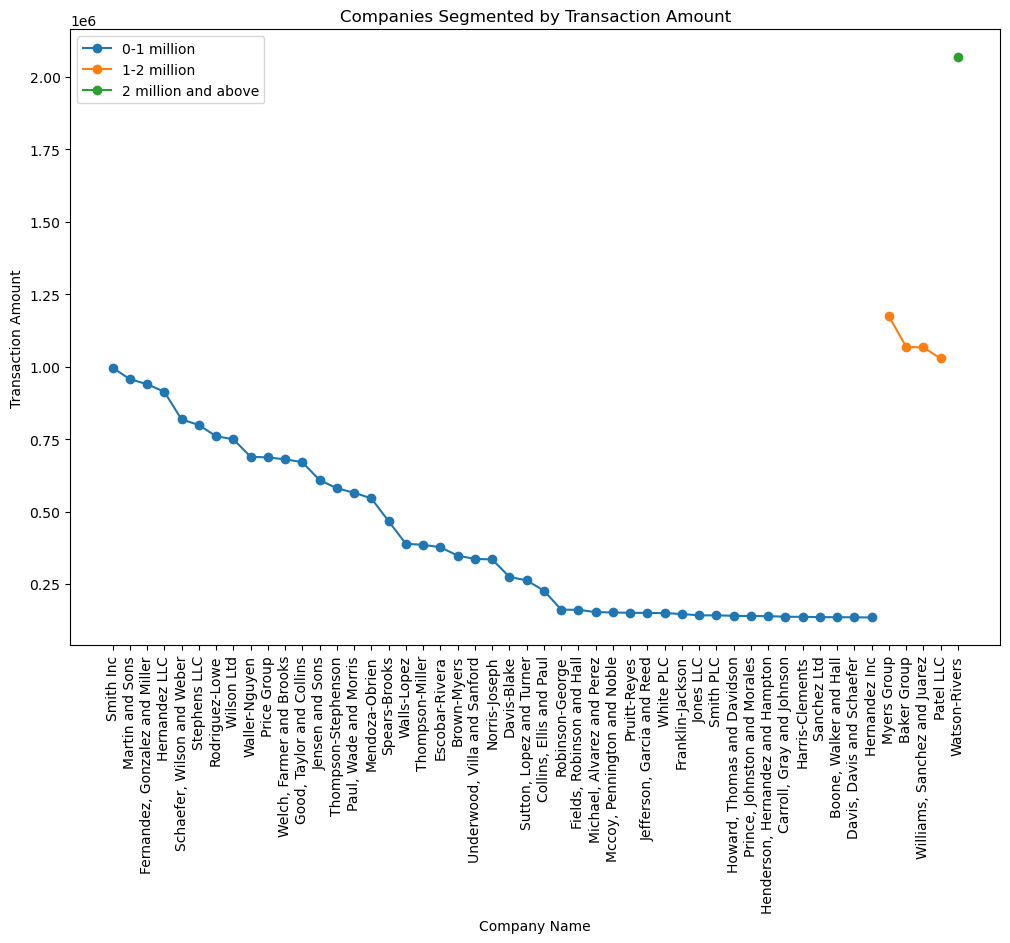

In [83]:
df_top_50 = top_50_companies.reset_index()

group_1 = df_top_50[df_top_50['transaction_amount'] <= 1000000]
group_2 = df_top_50[(df_top_50['transaction_amount'] > 1000000) & (df_top_50['transaction_amount'] < 2000000)]
group_3 = df_top_50[df_top_50['transaction_amount'] >= 2000000]

fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(group_1['company_name'], group_1['transaction_amount'], marker='o', linestyle='-', label='0-1 million')
ax.plot(group_2['company_name'], group_2['transaction_amount'], marker='o', linestyle='-', label='1-2 million')
ax.plot(group_3['company_name'], group_3['transaction_amount'], marker='o', linestyle='-', label='2 million and above')

ax.set_xlabel('Company Name')
ax.set_ylabel('Transaction Amount')

ax.set_title('Companies Segmented by Transaction Amount')

ax.tick_params(axis='x', rotation=90)
ax.legend()

plt.show()


*Ce code génère donc un graphique qui segmente et classe les transactions des entreprises en fonction de leurs montants. Chaque entreprise est représentée par une ligne avec des marqueurs, et les lignes sont réparties en fonction des plages de montants. Les noms des entreprises sont affichés sur l'axe des x et les montants de transaction sont affichés sur l'axe des y.*

N'hésitez pas à personnaliser le graphique en ajoutant des légendes, des couleurs ou d'autres fonctionnalités spécifiques à vos besoins.

## Tableau de bord interactif pour les transactions des entreprises.

Ce code utilise la bibliothèque Dash pour créer un tableau de bord interactif qui affiche les transactions des entreprises. Voici une explication courte du fonctionnement du code :

* Le code commence par charger les données à partir d'un fichier CSV dans un DataFrame pandas.

* Ensuite, une application Dash est créée et les styles et éléments HTML sont définis pour la mise en page du tableau de bord.

* Un graphique interactif est ajouté à l'application Dash en utilisant la composante `dcc.Graph`.

* Un callback est défini pour mettre à jour le graphique en fonction de la valeur sélectionnée dans les options de radio (le nombre de meilleures entreprises à afficher).

* Lorsque la valeur sélectionnée change, le callback est déclenché et les meilleures entreprises sont calculées à partir du DataFrame. 

* Un graphique à barres est créé à l'aide de la bibliothèque Plotly et les données des entreprises sont utilisées pour les axes x et y.

* Les paramètres de mise en page et de style du graphique sont configurés, y compris le titre, les étiquettes des axes et les couleurs.

* Le graphique mis à jour est renvoyé par le callback et affiché dans l'application `Dash`.

* L'application est exécutée sur le serveur local à l'aide de la méthode `run_server()`.

![Image](../image/img1.png)

![Image](../image/img2.png)

![Image](../image/img3.png)

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

df = pd.read_csv('data.csv')

app = dash.Dash(__name__)

colors = {
    'background': '#f9f9f9',
    'text': '#333333',
    'bar': '#007bff',
    'line': '#ff7f0e',
    'pie': ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
}

app.layout = html.Div(
    style={
        'backgroundColor': colors['background'],
        'padding': '30px',
        'fontFamily': 'Arial, sans-serif',
        'color': colors['text'],
    },
    children=[
        html.H1(
            "Top Company Transactions",
            style={'textAlign': 'center', 'marginBottom': '30px', 'color': colors['text']}
        ),
        html.Label(
            "Select the number of top companies to display:",
            style={'marginBottom': '10px', 'color': colors['text']}
        ),
        dcc.RadioItems(
            id='top-companies-selector',
            options=[
                {'label': 'Top 5', 'value': 5},
                {'label': 'Top 10', 'value': 10},
                {'label': 'Top 50', 'value': 50},
                {'label': 'Top 100', 'value': 100}
            ],
            value=10,
            labelStyle={'display': 'inline-block', 'marginRight': '10px', 'color': colors['text']},
        ),
        dcc.Graph(
            id='transaction-graph-bar',
            style={'height': '500px', 'marginTop': '30px'},
            config={'displayModeBar': False},
        ),
        dcc.Graph(
            id='transaction-graph-pie',
            style={'height': '400px', 'marginTop': '30px'},
            config={'displayModeBar': False},
        ),
        dcc.Graph(
            id='transaction-graph-line',
            style={'height': '400px', 'marginTop': '30px'},
            config={'displayModeBar': False},
        ),
    ],
)

@app.callback(
    Output('transaction-graph-bar', 'figure'),
    Output('transaction-graph-pie', 'figure'),
    Output('transaction-graph-line', 'figure'),
    Input('top-companies-selector', 'value')
)
def update_graph(selected_value):
    top_companies = df.groupby('company_name')['transaction_amount'].sum().nlargest(selected_value)

    # Bar Graph
    fig_bar = go.Figure(data=go.Bar(x=top_companies.index, y=top_companies.values))
    fig_bar.update_layout(
        title=f"Top {selected_value} Companies by Transaction Amount",
        xaxis_title="Company Name",
        yaxis_title="Transaction Amount",
        plot_bgcolor=colors['background'],
        paper_bgcolor=colors['background'],
        font=dict(color=colors['text']),
        margin=dict(t=80),
    )
    fig_bar.update_traces(
        marker_color=colors['bar'],
        marker_line_color=colors['bar'],
        marker_line_width=1.5,
        opacity=0.8,
    )

    # Pie Chart
    fig_pie = go.Figure(data=go.Pie(labels=top_companies.index, values=top_companies.values, hole=0.4))
    fig_pie.update_layout(
        title=f"Top {selected_value} Companies' Distribution",
        plot_bgcolor=colors['background'],
        paper_bgcolor=colors['background'],
        font=dict(color=colors['text']),
        margin=dict(t=80),
    )
    fig_pie.update_traces(marker=dict(colors=colors['pie']))

    # Line Graph
    company_totals = df.groupby('company_name')['transaction_amount'].sum()
    fig_line = go.Figure(data=go.Scatter(x=company_totals.index, y=company_totals.values, mode='lines+markers'))
    fig_line.update_layout(
        title="Company Transaction Amount Trend",
        xaxis_title="Company Name",
        yaxis_title="Transaction Amount",
        plot_bgcolor=colors['background'],
        paper_bgcolor=colors['background'],
        font=dict(color=colors['text']),
        margin=dict(t=80),
    )
    fig_line.update_traces(marker_color=colors['line'], marker_line_color=colors['line'], marker_line_width=1.5)

    return fig_bar, fig_pie, fig_line

if __name__ == '__main__':
    app.run_server(port=1060)

Si vous avez cette erreurs l'hors de l'éxecution
```python
* Serving Flask app '__main__'
 * Debug mode: off
Address already in use
Port 8059 is in use by another program. Either identify and stop that program, or start the server with a different port.

## Changer le port
if __name__ == '__main__':
    app.run_server(port=8059) # port --> ex: 8888 au lieu de 8059  🧏‍♂️

*En résumé, ce code crée un tableau de bord interactif avec Dash, qui affiche un graphique à barres des transactions des entreprises. L'utilisateur peut sélectionner le nombre de meilleures entreprises à afficher, et le graphique est mis à jour en temps réel en fonction de cette sélection.*

N'hésitez pas à personnaliser davantage le tableau de bord en ajoutant des fonctionnalités supplémentaires, des styles ou des composantes selon vos besoins spécifiques.


# <font color="orange">Prévision Future des dépenses des entreprises</font>

La prévision future des dépenses des entreprises est un processus d'analyse visant à estimer les dépenses futures qu'une entreprise pourrait effectuer sur une période donnée. Cette prévision est basée sur l'analyse des dépenses passées et des tendances de dépenses des entreprises. L'objectif principal de la prévision des dépenses futures est d'aider les entreprises à planifier leurs ressources financières, à prendre des décisions éclairées et à anticiper les besoins futurs.

Avantages de la prévision future des dépenses des entreprises:

1. *Planification financière* : La prévision des dépenses futures permet aux entreprises de planifier leurs ressources financières de manière proactive. Cela leur donne une vision claire des dépenses à venir, ce qui facilite la budgétisation, l'allocation des ressources et la prise de décision en matière d'investissement.

2. *Anticipation des besoins* : En analysant les tendances de dépenses passées et en les extrapolant dans le futur, les entreprises peuvent anticiper les besoins en termes de ressources, de matières premières, de main-d'œuvre, etc. Cela leur permet de se préparer en conséquence, d'éviter les pénuries et de maintenir des opérations efficaces.

3. *Optimisation des processus d'approvisionnement* : En prévoyant les dépenses futures, les entreprises peuvent ajuster leurs processus d'approvisionnement en fonction des volumes et des délais prévus. Cela permet de réduire les coûts, d'optimiser les stocks et d'améliorer la gestion de la chaîne d'approvisionnement.

Types de rapports d'analyste découlant de la prévision future des dépenses des entreprises:

1. *Rapport de prévision des dépenses* : Ce rapport présente une analyse détaillée des dépenses futures prévues pour chaque entreprise. Il fournit des informations sur les tendances de dépenses, les estimations financières, les prévisions de croissance et les facteurs influençant les dépenses.

2. *Rapport d'analyse comparative* : Ce rapport compare les dépenses prévues des entreprises avec les dépenses réelles ou les dépenses prévues d'autres entreprises du même secteur. Il permet d'identifier les écarts, d'évaluer la performance financière et de repérer les opportunités d'optimisation des dépenses.

3. *Rapport de recommandations* : Ce rapport propose des recommandations spécifiques pour optimiser les dépenses futures des entreprises. Il peut inclure des suggestions d'optimisation des coûts, de réduction des dépenses non essentielles, d'amélioration des processus d'approvisionnement, etc.

*En résumé, la prévision future des dépenses des entreprises offre de nombreux avantages en termes de planification financière, d'anticipation des besoins et d'optimisation des processus. Les rapports d'analyste découlant de cette prévision fournissent des informations précieuses pour la prise de décision et l'optimisation des stratégies financières.*

Ce notebook Jupyter démontre comment prévoir les dépenses futures pour chaque entreprise en se basant sur les données de transactions historiques.

# Importation des bibliothèques
Tout d'abord, importons les bibliothèques nécessaires :

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

# Chargement et préparation des données
Ensuite, nous chargerons les données de transactions dans un DataFrame et les préparerons pour l'analyse :

In [96]:
# df = pd.read_csv('data.csv') --> we won't need this line because we have clean and process the updated dateset
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

Nous convertissons la colonne 'transaction_date' en type datetime pour assurer des calculs de dates précis.

# Calcul des dépenses actuelles et prévues
Nous calculons les dépenses actuelles et prévues pour chaque entreprise :

In [97]:
company_spending = df.groupby('company_name')['transaction_amount'].sum()
company_duration = df.groupby('company_name')['transaction_date'].apply(lambda x: (x.max() - x.min()).days)
company_average_daily_spending = company_spending / company_duration
future_period = 365
company_forecasted_spending = company_average_daily_spending * future_period

### Company Spending
Calcule les dépenses totales pour chaque entreprise.
### Company Duration
Calcule la durée (en jours) des transactions pour chaque entreprise.
### Company Average Daily Spending
Calcule les dépenses moyennes par jour pour chaque entreprise.
### Future Period
Définit le nombre de jours pour lesquels nous voulons prévoir les dépenses.
### Company Forecasted Spending
Estime les dépenses prévues pour chaque entreprise en se basant sur les dépenses moyennes quotidiennes et la période future.


# Visualisation des dépenses actuelles et prévues
Enfin, nous créons un graphique à barres pour visualiser les dépenses actuelles et prévues pour chaque entreprise :

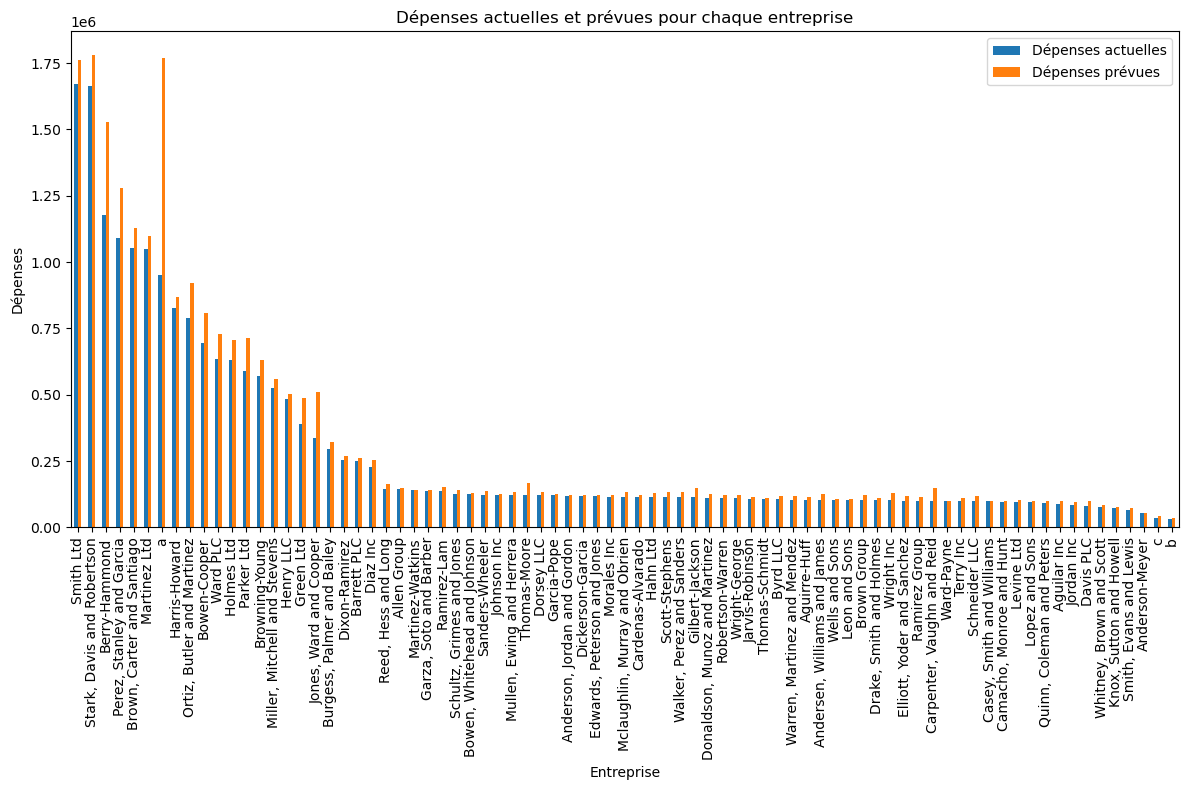

In [98]:
df_spending = pd.DataFrame({'Dépenses actuelles': company_spending, 'Dépenses prévues': company_forecasted_spending})
df_spending = df_spending.sort_values('Dépenses actuelles', ascending=False)

fig, ax = plt.subplots(figsize=(12, 8))
df_spending.plot(kind='bar', ax=ax)
ax.set_xlabel('Entreprise')
ax.set_ylabel('Dépenses')
ax.set_title('Dépenses actuelles et prévues pour chaque entreprise')
ax.legend()
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

*Le code crée un DataFrame (df_spending) avec les dépenses actuelles et prévues pour chaque entreprise. Le DataFrame est ensuite trié par ordre décroissant en fonction des dépenses actuelles.*

*Un graphique à barres est généré en utilisant le DataFrame trié pour visualiser les dépenses actuelles et prévues pour chaque entreprise. L'axe des x représente les noms des entreprises, et l'axe des y représente les montants des dépenses. Le graphique inclut des étiquettes appropriées, un titre et une légende.*

En exécutant ce notebook, vous pouvez analyser les données de dépenses historiques et générer des prévisions pour les dépenses futures de chaque entreprise.

N'hésitez pas à modifier et améliorer ce notebook pour répondre à vos besoins et préférences spécifiques.